In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [2]:
# import the train datasets
train_df = pd.read_csv("train.csv")


In [3]:
# import the test set
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train_df.shape# shape of the training data

(8523, 12)

In [7]:
# shape of the training data
test_df.shape

(5681, 11)

In [8]:
train_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
test_df.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [10]:
# missing values in the test and train sets
train_df.columns[train_df.isna().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [11]:
# missing values in the test set
test_df.columns[test_df.isna().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [12]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<AxesSubplot:>

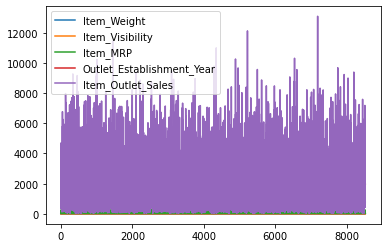

In [16]:
train_df.plot()

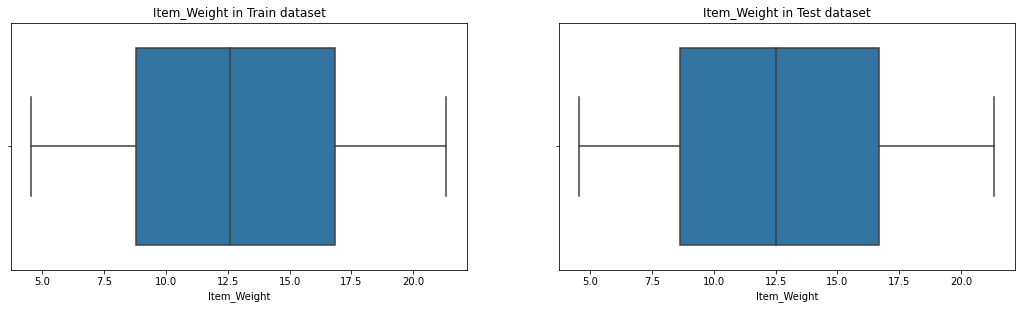

In [17]:
# handle missing values
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plt.title('Item_Weight in Train dataset')
sns.boxplot(x='Item_Weight', data=train_df)

plt.subplot(2,2,2)
plt.title('Item_Weight in Test dataset')
sns.boxplot(x='Item_Weight', data=test_df)

plt.show()

In [18]:
# Use the mean to replace the null values in Item_Weight feature
train_df.Item_Weight = train_df.Item_Weight.fillna(train_df.Item_Weight.mean())
test_df.Item_Weight = test_df.Item_Weight.fillna(test_df.Item_Weight.mean())

In [19]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
# outlet size values in the train data
train_df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
# outlet size values in the test data
test_df.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [22]:
# fill missing values with the modal value
train_df.Outlet_Size.fillna(train_df.Outlet_Size.mode()[0])
test_df.Outlet_Size.fillna(test_df.Outlet_Size.mode()[0])

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
5676     Small
5677    Medium
5678    Medium
5679    Medium
5680    Medium
Name: Outlet_Size, Length: 5681, dtype: object

In [23]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [24]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
# have common attribute names for the Item_Fat_Content
train_df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
train_df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
train_df.Item_Fat_Content = train_df.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'],
                                                              value=['Low Fat', 'Low Fat', 'Regular'])

In [28]:
train_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
# replace same value to testing data
test_df.Item_Fat_Content = test_df.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'],
                                                      value=['Low Fat', 'Low Fat', 'Regular'])

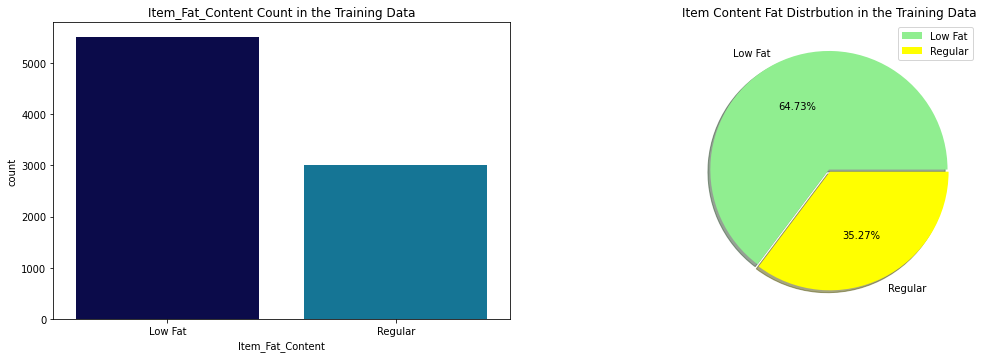

In [30]:
# item fat count in the data

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Item_Fat_Content Count in the Training Data")
sns.countplot(x='Item_Fat_Content', data=train_df, palette='ocean')

plt.subplot(2,2,2)
low_fat = train_df.Item_Fat_Content[train_df.Item_Fat_Content == 'Low Fat'].count()
reg = train_df.Item_Fat_Content[train_df.Item_Fat_Content == 'Regular'].count()
plt.title("Item Content Fat Distrbution in the Training Data")
plt.pie([low_fat, reg], labels=['Low Fat', 'Regular'], explode=[0.01,0.01], autopct="%.2f%%", colors=['lightgreen', 'yellow'], shadow=True)
plt.legend()

plt.show()

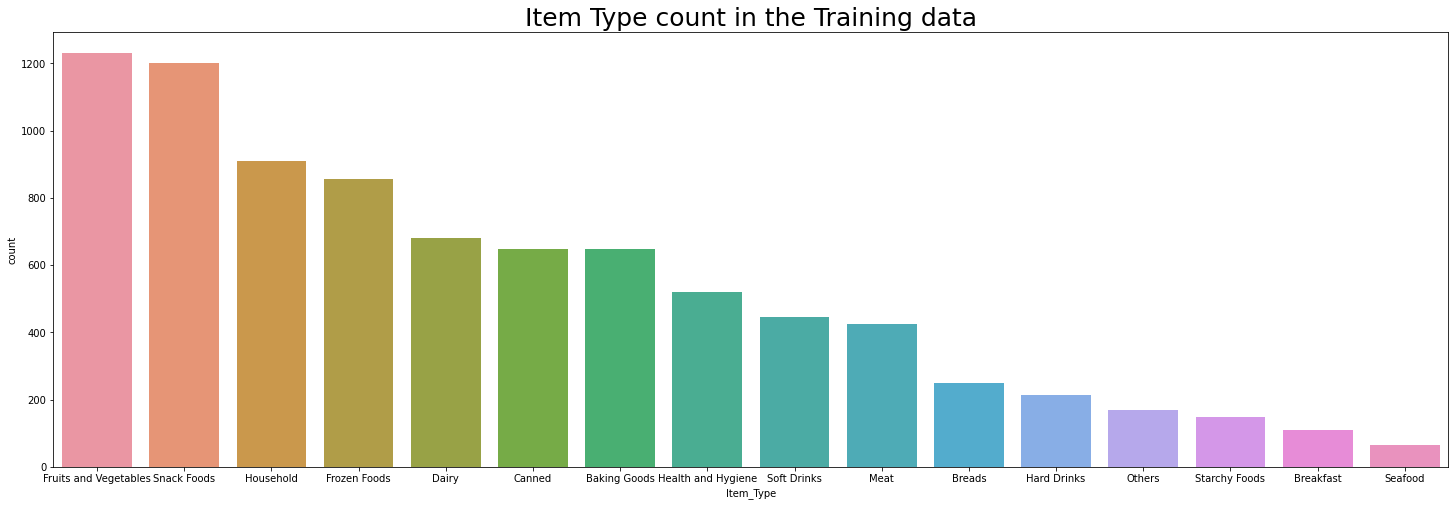

In [31]:
# largely sold items in the supermarket
plt.figure(figsize=(25,8))
plt.title("Item Type count in the Training data", {"fontsize" : 25})
order = train_df.groupby('Item_Type').count().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.countplot(x='Item_Type', data=train_df, order=order);

In [32]:
train_df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [33]:
train_df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

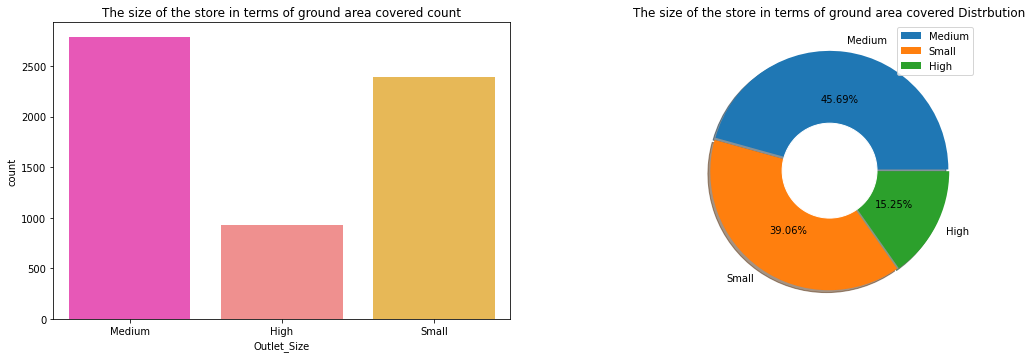

In [34]:
# the distribution of the stores. by size of the area covered
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("The size of the store in terms of ground area covered count")
sns.countplot(x='Outlet_Size', data=train_df, palette='spring')

plt.subplot(2,2,2)
medium = train_df.Outlet_Size[train_df.Outlet_Size == 'Medium'].count()
small = train_df.Outlet_Size[train_df.Outlet_Size == 'Small'].count()
high = train_df.Outlet_Size[train_df.Outlet_Size == 'High'].count()
plt.title("The size of the store in terms of ground area covered Distrbution")
plt.pie([medium, small, high], labels=['Medium', 'Small', 'High'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()

plt.show()

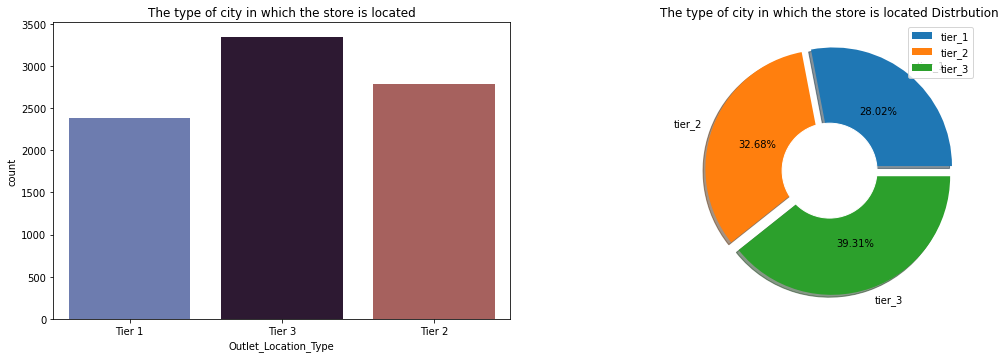

In [35]:
# location the store is located
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("The type of city in which the store is located")
sns.countplot(x='Outlet_Location_Type', data=train_df, palette='twilight')

plt.subplot(2,2,2)
tier_1 = train_df.Outlet_Location_Type[train_df.Outlet_Location_Type == 'Tier 1'].count()
tier_2 = train_df.Outlet_Location_Type[train_df.Outlet_Location_Type == 'Tier 2'].count()
tier_3 = train_df.Outlet_Location_Type[train_df.Outlet_Location_Type == 'Tier 3'].count()
plt.title("The type of city in which the store is located Distrbution")
plt.pie([tier_1, tier_2, tier_3], labels=['tier_1', 'tier_2', 'tier_3'], autopct="%.2f%%", shadow=True, explode=[0.05,0.05,0.05])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()

plt.show()

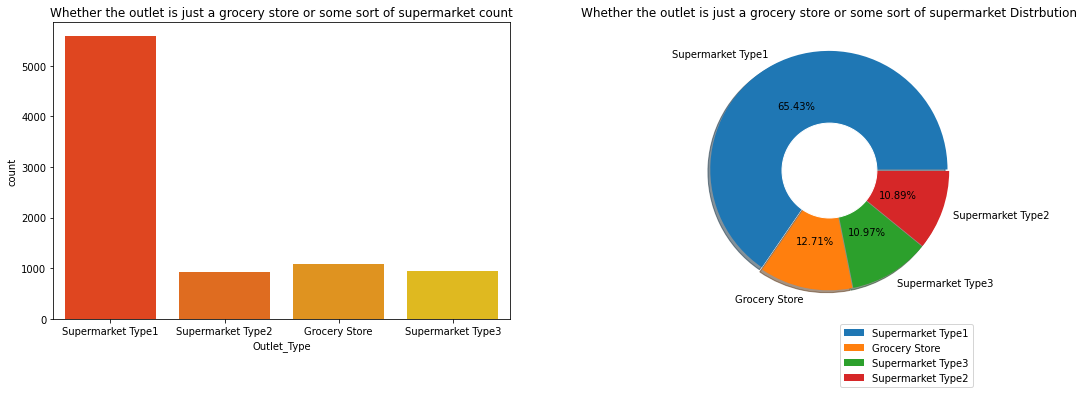

In [36]:
# type of the outlet store in terms of goods sold

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Whether the outlet is just a grocery store or some sort of supermarket count")
sns.countplot(x='Outlet_Type', data=train_df, palette='autumn')

plt.subplot(2,2,2)
sup_1 = train_df.Outlet_Type[train_df.Outlet_Type == 'Supermarket Type1'].count()
goc = train_df.Outlet_Type[train_df.Outlet_Type == 'Grocery Store'].count()
sup_3 = train_df.Outlet_Type[train_df.Outlet_Type == 'Supermarket Type3'].count()
sup_2 = train_df.Outlet_Type[train_df.Outlet_Type == 'Supermarket Type2'].count()
plt.title("Whether the outlet is just a grocery store or some sort of supermarket Distrbution")
plt.pie([sup_1, goc, sup_3, sup_2], labels=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01, 0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(1, 0))

plt.show()

In [37]:
# type of the outlet store
train_df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [38]:
# establishment year values
train_df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [39]:
train_df['Age'] = 2021 - train_df.Outlet_Establishment_Year
test_df['Age'] = 2021 - test_df.Outlet_Establishment_Year

In [40]:
train_df.Age.value_counts()

36    1463
34     932
22     930
24     930
17     930
19     929
12     928
14     926
23     555
Name: Age, dtype: int64

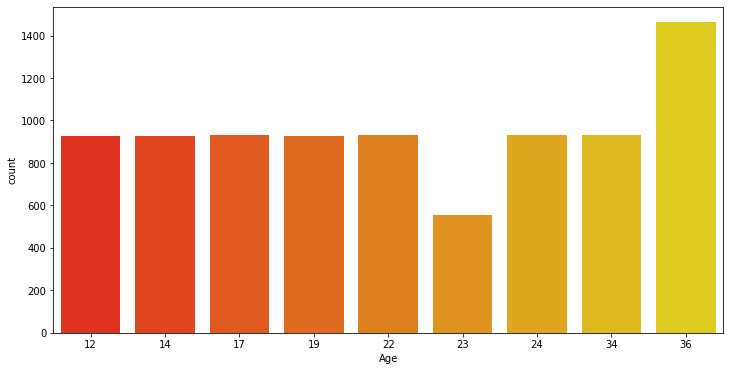

In [41]:
# Age of the stores
plt.figure(figsize=(12,6))

sns.countplot(x='Age', data=train_df, palette='autumn');

In [42]:
FEATURES = [col for col in train_df.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier']]
cat_features = [col for col in FEATURES if train_df[col].nunique() < 25]
cont_features = [col for col in FEATURES if train_df[col].nunique() >= 25]

In [43]:
FEATURES

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Age']

In [44]:
print(cat_features)
print(cont_features)

['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Age']
['Item_Weight', 'Item_Visibility', 'Item_MRP']


In [45]:
# ncols = 3
# nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))-1

# fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

# for r in range(nrows):
#     for c in range(ncols):
#         col = cat_features[r*ncols+c]
#         sns.barplot(y=train_df['Item_Outlet_Sales'], x=train_df[col], ax=axes[r, c], palette='autumn', label='Train data')
#         axes[r, c].set_ylabel('')
#         axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
#         axes[r, c].tick_params(labelsize=10, width=0.5)
#         axes[r, c].xaxis.offsetText.set_fontsize(6)
#         axes[r, c].yaxis.offsetText.set_fontsize(6)
# plt.show()


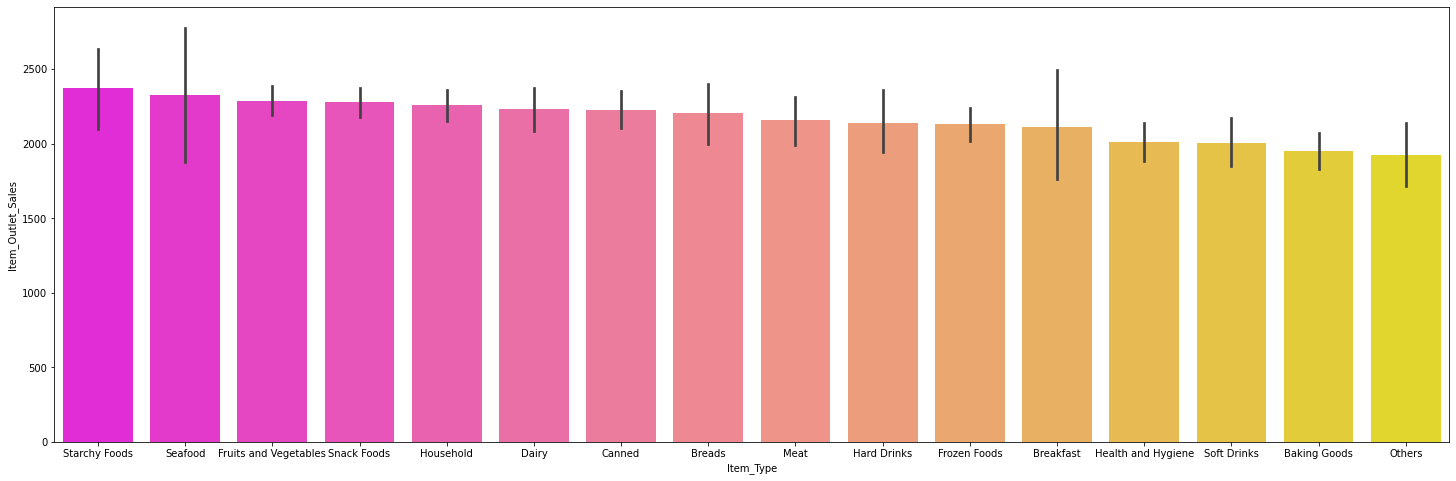

In [46]:
# stock variability sales 
plt.figure(figsize=(25,8))

order=train_df.groupby('Item_Type').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train_df,palette='spring', order=order);

In [47]:
# # distrbution of the continous features
# plt.figure(figsize=(10,20))
# plt.subplot(4,1,1)
# plt.title("Item_Weight Distrbution")
# sns.kdeplot(x='Item_Weight', data=train_df)

# plt.subplot(4,1,2)
# plt.title("Item_Visibility Distrbution")
# sns.kdeplot(x='Item_Visibility', data=train_df);

# plt.subplot(4,1,3)
# plt.title("Item_MRP Distrbution")
# sns.kdeplot(x='Item_MRP', data=train_df);

# plt.subplot(4,1,4)
# plt.title("Item_Outlet_Sales")
# sns.kdeplot(x='Item_Visibility', data=train_df);

In [48]:
# plt.figure(figsize=(18,15))
# plt.subplot(3,1,1)
# sns.lineplot(x='Item_Weight', y='Item_Outlet_Sales', data=train_df);

# plt.subplot(3,1,2)
# sns.lineplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_df);

# plt.subplot(3,1,3)
# sns.lineplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


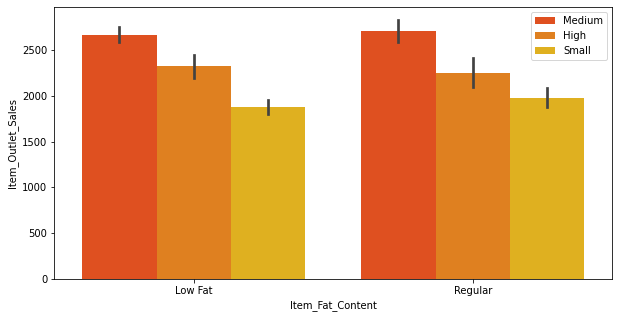

In [49]:
# 
plt.figure(figsize=(10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',hue='Outlet_Size',data=train_df,palette='autumn')
plt.legend()
plt.show()

In [50]:
#apply Label Encoder to convert Categorical ordered features to numeric
encode = LabelEncoder()
list_transform = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']

for i in list_transform:
    train_df[i] = encode.fit_transform(train_df[i])
    
for i in list_transform:
    test_df[i] = encode.fit_transform(test_df[i])

In [51]:
#drop non needed features
train_df = train_df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test_df = test_df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [52]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,22
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,3,2,0,732.3800,23
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,34


In [53]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,20.750000,0,0.007565,Snack Foods,107.8622,1,0,1,22
1,8.300000,1,0.038428,Dairy,87.3198,3,1,1,14
2,14.600000,0,0.099575,Others,241.7538,3,2,0,23
3,7.315000,0,0.015388,Snack Foods,155.0340,3,1,1,14
4,12.695633,1,0.118599,Dairy,234.2300,1,2,3,36


In [54]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,22
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,3,2,0,732.3800,23
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,34


In [55]:
#correlation values in the set
train_df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
Item_Weight,1.000000,-0.021157,-0.012049,0.024756,-0.015096,0.004088,-0.000566,0.011550,0.008301
Item_Fat_Content,-0.021157,1.000000,0.047314,0.006063,-0.001365,-0.001598,0.002199,0.018719,-0.003151
Item_Visibility,-0.012049,0.047314,1.000000,-0.001315,0.087796,-0.028099,-0.173468,-0.128625,0.074834
Item_MRP,0.024756,0.006063,-0.001315,1.000000,-0.002473,0.000232,-0.001975,0.567574,-0.005020
Outlet_Size,-0.015096,-0.001365,0.087796,-0.002473,1.000000,-0.290216,-0.432062,-0.172477,-0.470343
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.000232,-0.290216,1.000000,0.467219,0.089367,0.089216
Outlet_Type,-0.000566,0.002199,-0.173468,-0.001975,-0.432062,0.467219,1.000000,0.401522,0.122304
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.567574,-0.172477,0.089367,0.401522,1.000000,0.049135
Age,0.008301,-0.003151,0.074834,-0.005020,-0.470343,0.089216,0.122304,0.049135,1.000000


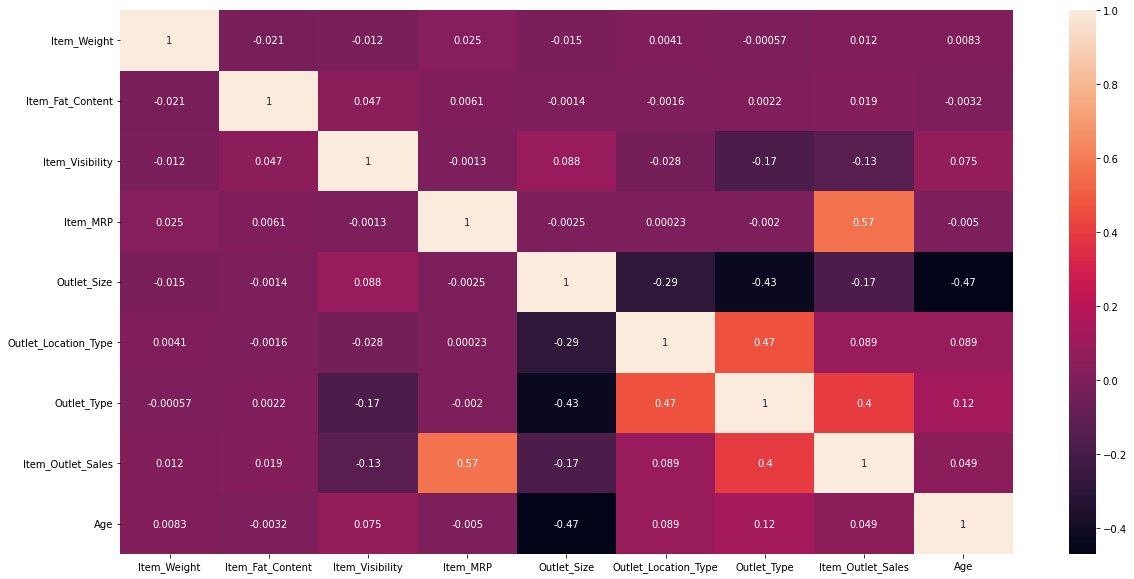

In [56]:
# correlation value
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(), annot=True);

In [57]:
#apply one hot encoder to convert non-order categorical featuers
dummies1 = pd.get_dummies(train_df.Item_Type)
dummies2 = pd.get_dummies(test_df.Item_Type)

In [58]:
dummies1

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [59]:
train_df = pd.concat([train_df, dummies1], axis=1)
test_df = pd.concat([test_df, dummies2], axis=1)

In [60]:
train_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,Meat,141.6180,1,0,1,2097.2700,22,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,3,2,0,732.3800,23,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,Household,53.8614,0,2,1,994.7052,34,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,0,2,1,2778.3834,34,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,Baking Goods,108.1570,3,1,1,549.2850,19,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,Health and Hygiene,85.1224,2,1,1,1193.1136,17,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,Snack Foods,103.1332,1,2,2,1845.5976,12,...,0,0,0,0,0,0,0,1,0,0


In [61]:
#drop the main feature and one dummy feature
train_df.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)
test_df.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)

In [62]:
train_df = pd.concat([train_df, dummies1], axis=1)
test_df = pd.concat([test_df, dummies2], axis=1)

In [63]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,22,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,12,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,22,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,3,2,0,732.3800,23,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,1,994.7052,34,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,20.750000,0,0.007565,107.8622,1,0,1,22,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,1,0.038428,87.3198,3,1,1,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,241.7538,3,2,0,23,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,0,0.015388,155.0340,3,1,1,14,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,1,0.118599,234.2300,1,2,3,36,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,22,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,12,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,22,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,3,2,0,732.3800,23,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,1,994.7052,34,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
cont_features

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [67]:
#drop the main feature and one dummy feature
train_df.drop(['Starchy Foods'], axis=1, inplace=True)
# test_df.drop(['Item_type','Starchy Foods'],axiis=1,inplace=True)

In [68]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Baking Goods,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,22,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,12,0,...,0,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,22,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,1,0.000000,182.0950,3,2,0,732.3800,23,0,...,0,1,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,1,994.7052,34,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
# continous features in the set
cont_features

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [70]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Baking Goods,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,22,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,12,0,...,0,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,22,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,1,0.000000,182.0950,3,2,0,732.3800,23,0,...,0,1,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,1,994.7052,34,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
# create an instance of the categorical features

X = train_df[cont_features]
X.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614


In [72]:
test2 = test_df[cont_features]
test2.head()

,Item_Weight,Item_Visibility,Item_MRP
0,20.750000,0.007565,107.8622
1,8.300000,0.038428,87.3198
2,14.600000,0.099575,241.7538
3,7.315000,0.015388,155.0340
4,12.695633,0.118599,234.2300


In [73]:
# FEATURE SCALING
scaler = StandardScaler()
X = scaler.fit_transform(X)
test2 = scaler.fit_transform(test2)

In [74]:
# convert scaled categorical features into a dataframe
X = pd.DataFrame(X, columns=cont_features)
test2 = pd.DataFrame(test2, columns=cont_features)

In [75]:
X

,Item_Weight,Item_Visibility,Item_MRP
0,-0.841872,-0.970732,1.747454
1,-1.641706,-0.908111,-1.489023
2,1.098554,-0.956917,0.010040
3,1.500838,-1.281758,0.660050
4,-0.929428,-1.281758,-1.399220
...,...,...,...
8518,-1.418084,-0.181193,1.180783
8519,-1.059578,-0.371154,-0.527301
8520,-0.534243,-0.599784,-0.897208
8521,-1.336444,1.532880,-0.607977


In [76]:
# Feature variables not in the Item_outlet_sales
FEATURES = [col for col in train_df.columns if col not in ['Item_Outlet_Sales']]
FEATURES

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Age',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks']

In [77]:
train_df.nunique()

Item_Weight               416
Item_Fat_Content            2
Item_Visibility          7880
Item_MRP                 5938
Outlet_Size                 4
Outlet_Location_Type        3
Outlet_Type                 4
Item_Outlet_Sales        3493
Age                         9
Baking Goods                2
Breads                      2
Breakfast                   2
Canned                      2
Dairy                       2
Frozen Foods                2
Fruits and Vegetables       2
Hard Drinks                 2
Health and Hygiene          2
Household                   2
Meat                        2
Others                      2
Seafood                     2
Snack Foods                 2
Soft Drinks                 2
Baking Goods                2
Breads                      2
Breakfast                   2
Canned                      2
Dairy                       2
Frozen Foods                2
Fruits and Vegetables       2
Hard Drinks                 2
Health and Hygiene          2
Household 

In [78]:
train_df[FEATURES]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Baking Goods,Baking Goods,...,Meat,Meat,Others,Others,Seafood,Seafood,Snack Foods,Snack Foods,Soft Drinks,Soft Drinks
0,9.300,0,0.016047,249.8092,1,0,1,22,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,1,2,2,12,0,0,...,0,0,0,0,0,0,0,0,1,1
2,17.500,0,0.016760,141.6180,1,0,1,22,0,0,...,1,1,0,0,0,0,0,0,0,0
3,19.200,1,0.000000,182.0950,3,2,0,23,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,0,2,1,34,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,1,34,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,1,0.046982,108.1570,3,1,1,19,1,1,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,85.1224,2,1,1,17,0,0,...,0,0,0,0,0,0,0,0,0,0
8521,7.210,1,0.145221,103.1332,1,2,2,12,0,0,...,0,0,0,0,0,0,1,1,0,0


In [79]:

cat_features = [col for col in FEATURES if isinstance(train_df[col], pd.Series) and train_df[col].nunique() < 25]
cat_features

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Age']

In [80]:
# Assign feature and target variables
X = pd.concat([X, train_df[cat_features]], axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,-0.841872,-0.970732,1.747454,0,1,0,1,22
1,-1.641706,-0.908111,-1.489023,1,1,2,2,12
2,1.098554,-0.956917,0.010040,0,1,0,1,22
3,1.500838,-1.281758,0.660050,1,3,2,0,23
4,-0.929428,-1.281758,-1.399220,0,0,2,1,34


In [81]:
# target variable
y = train_df.Item_Outlet_Sales
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [82]:
test2 = pd.concat([test2, test_df[cat_features]], axis=1)
test2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,1.897460e+00,-1.134077,-0.536555,0,1,0,1,22
1,-1.035530e+00,-0.531850,-0.868937,1,3,1,1,14
2,4.486336e-01,0.661316,1.629848,0,3,2,0,23
3,-1.267578e+00,-0.981416,0.226697,0,3,1,1,14
4,4.184768e-16,1.032540,1.508110,1,1,2,3,36


In [83]:
train_df.shape

(8523, 39)

In [84]:
X.shape

(8523, 8)

In [85]:
test2.shape

(5681, 8)

In [86]:
# split the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [87]:
# get train and test values
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6818, 8) (6818,)
(1705, 8) (1705,)


# Fit different models on the data and test accuracy

In [88]:
# fit different models on the data
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

In [89]:
# fit a Random forest Regressor modelon the data
rf_model = RandomForestRegressor()
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 55.13041566948162%
Random Forest model score on Training data: 93.82407393230137%
Random Forest model score on Testing data: 55.47480402985789%


In [90]:
r2(rf_model, "Random Forest")

R2 Score for Random Forest is 55.47480402985789%


In [91]:
# fit gradient boosting regressor model on the data
g_br = GradientBoostingRegressor()
kfolds(g_br, "Gradient Boosting")
train(g_br, "Gradient Boosting")

Gradient Boosting score on cross validation: 59.4631313431656%
Gradient Boosting model score on Training data: 63.493897387022756%
Gradient Boosting model score on Testing data: 59.248686163362386%


In [92]:
# R squared score on training data
r2(g_br,"Gradient Boosting")

R2 Score for Gradient Boosting is 59.248686163362386%


In [93]:
# fit a  bagging regressor model on the data
br = BaggingRegressor()
kfolds(br, "Bagging")
train(br, "Bagging")

Bagging score on cross validation: 51.707310483656435%
Bagging model score on Training data: 91.6242107492423%
Bagging model score on Testing data: 51.69988591019621%


In [94]:
# R squared score on training data
r2(br,"Bagging")

R2 Score for Bagging is 51.69988591019621%


In [95]:
# fit the gradient boosting model on the data
g_br.fit(X,y)

GradientBoostingRegressor()

In [96]:
# score of the model on the data
g_br.score(X,y)

0.6279618966462441

In [97]:
#predict the sales value of the X_test
Item_sales_pred = g_br.predict(X_test)

In [98]:
Item_sales_pred

array([2579.40516915, 1869.42781126, 2183.88282497, ..., 4322.07774285,
         82.92065562, 6163.35660377])

In [99]:
len(Item_sales_pred)

1705

In [100]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor

# # Initialize the models
# linear_regression = LinearRegression()
# random_forest = RandomForestRegressor()
# gradient_boosting = GradientBoostingRegressor()
# bagging = BaggingRegressor()
# support_vector = SVR()
# decision_tree = DecisionTreeRegressor()
# xgboost = XGBRegressor()

# # Define a list of models and their names
# models = [
#     (linear_regression, "Linear Regression"),
#     (random_forest, "Random Forest"),
#     (gradient_boosting, "Gradient Boosting"),
#     (bagging, "Bagging"),
#     (support_vector, "Support Vector Machine"),
#     (decision_tree, "Decision Tree"),
#     (xgboost, "XGBoost")
# ]

# # Fit the models and evaluate their performance using cross-validation
# for model, model_name in models:
#     scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
#     mean_score = scores.mean()
#     std_score = scores.std()
#     print(f"{model_name}: Mean R^2 Score: {mean_score:.4f}, Standard Deviation: {std_score:.4f}")


In [101]:
# fine tune the Gradient boosting model and select best parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [102]:

# Create the Gradient Boosting regressor
gbr_model = GradientBoostingRegressor(random_state=0)

In [103]:
# Perform grid search
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [104]:

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [105]:
# Fit the model with the best parameters
best_gbr_model = GradientBoostingRegressor(random_state=0, **best_params)
best_gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_leaf=4, n_estimators=50, random_state=0)

In [106]:

# Evaluate the model
y_pred = best_gbr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)


In [107]:
best_params

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}